**Image Classification Deployment**

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile,os
local_zip = '/content/drive/MyDrive/Dicoding/Submission 3/Food Classification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [ ]:
#train dataset
base_path = '/content/drive/MyDrive/Dicoding/Submission 3/kaggle/train'
classes = os.listdir(base_path)
filepaths = []
labels = []
for c in classes:
    flist = os.listdir(base_path + '/' + c)
    for f in flist:
        fpath = os.path.join(base_path, c, f)
        filepaths.append(fpath)
        labels.append(c)
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))

filepaths:  11520    labels:  11520


In [ ]:
import pandas as pd

Fseries=pd.Series(filepaths, name='file_paths')
Lseries=pd.Series(labels, name='labels')
train_df=pd.concat([Fseries,Lseries], axis=1)
train_df=pd.DataFrame(train_df, columns = ['file_paths', 'labels'])
print(train_df['labels'].value_counts())

34-Cold Salad with Mango                          240
06-Vegetable Orange Curry with Shrimp             240
19-Pork Knuckle Rice                              240
22-Tom Yum Fried Rice                             240
09-Fried Egg                                      240
24-Chicken and Rice                               240
31-Pad Thai-Thai Fried Noodles                    240
41-Wichian Grilled Chicken                        240
00-Thai Green Curry                               240
42-Thai Pumpkin Custard                           240
47-Thai Curry Fish CUstard                        240
15-Goong Pao-Grilled Shrimp                       240
26-Chicken Drumstick Soup                         240
07-Stir Fried Chicken with Cashew Nuts            240
02-Thai Spicy Mixed Vegetable Soup with Prawns    240
18-Mango Sticky Rice                              240
25-Rice and Chicken Biryani                       240
40-Shrimp Glass Noodle Salad                      240
32-Minced Pork Salad        

In [ ]:
#validation dataset
base_path = '/content/drive/MyDrive/Dicoding/Submission 3/kaggle/valid'
classes = os.listdir(base_path)
filepaths = []
labels = []
for c in classes:
    flist = os.listdir(base_path + '/' + c)
    for f in flist:
        fpath = os.path.join(base_path, c, f)
        filepaths.append(fpath)
        labels.append(c)
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))

filepaths:  1440    labels:  1440


In [ ]:
Fseries=pd.Series(filepaths, name='file_paths')
Lseries=pd.Series(labels, name='labels')
valid_df=pd.concat([Fseries,Lseries], axis=1)
valid_df=pd.DataFrame(valid_df, columns = ['file_paths', 'labels'])
print(valid_df['labels'].value_counts())

47-Thai Curry Fish CUstard                        30
46-Pork Satay                                     30
25-Rice and Chicken Biryani                       30
01-Morning Glory and Pork Thai Curry              30
04-Bitter Gourd Soup                              30
39-Winged Bean Salad with Minced Pork             30
44-Papaya Salad                                   30
30-Morning Glory                                  30
26-Chicken Drumstick Soup                         30
11-Soy Sauce Eggs                                 30
12-Boiled Banana in Coconut Milk                  30
07-Stir Fried Chicken with Cashew Nuts            30
14-Caesar Salad                                   30
02-Thai Spicy Mixed Vegetable Soup with Prawns    30
45-Grilled Pork with Fresh Milk                   30
36-Stir Fried Clams with Chili Paste              30
18-Mango Sticky Rice                              30
42-Thai Pumpkin Custard                           30
23-Fried Rice                                 

In [ ]:
#test dataset
base_path = '/content/drive/MyDrive/Dicoding/Submission 3/kaggle/test'
classes = os.listdir(base_path)
filepaths = []
labels = []
for c in classes:
    flist = os.listdir(base_path + '/' + c)
    for f in flist:
        fpath = os.path.join(base_path, c, f)
        filepaths.append(fpath)
        labels.append(c)
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))

filepaths:  1440    labels:  1440


In [ ]:
Fseries=pd.Series(filepaths, name='file_paths')
Lseries=pd.Series(labels, name='labels')
test_df=pd.concat([Fseries,Lseries], axis=1)
test_df=pd.DataFrame(test_df, columns = ['file_paths', 'labels'])
print(test_df['labels'].value_counts())

47-Thai Curry Fish CUstard                        30
46-Pork Satay                                     30
25-Rice and Chicken Biryani                       30
01-Morning Glory and Pork Thai Curry              30
04-Bitter Gourd Soup                              30
39-Winged Bean Salad with Minced Pork             30
44-Papaya Salad                                   30
30-Morning Glory                                  30
26-Chicken Drumstick Soup                         30
11-Soy Sauce Eggs                                 30
16-Pepper Shrimp                                  30
07-Stir Fried Chicken with Cashew Nuts            30
14-Caesar Salad                                   30
02-Thai Spicy Mixed Vegetable Soup with Prawns    30
45-Grilled Pork with Fresh Milk                   30
36-Stir Fried Clams with Chili Paste              30
18-Mango Sticky Rice                              30
42-Thai Pumpkin Custard                           30
23-Fried Rice                                 

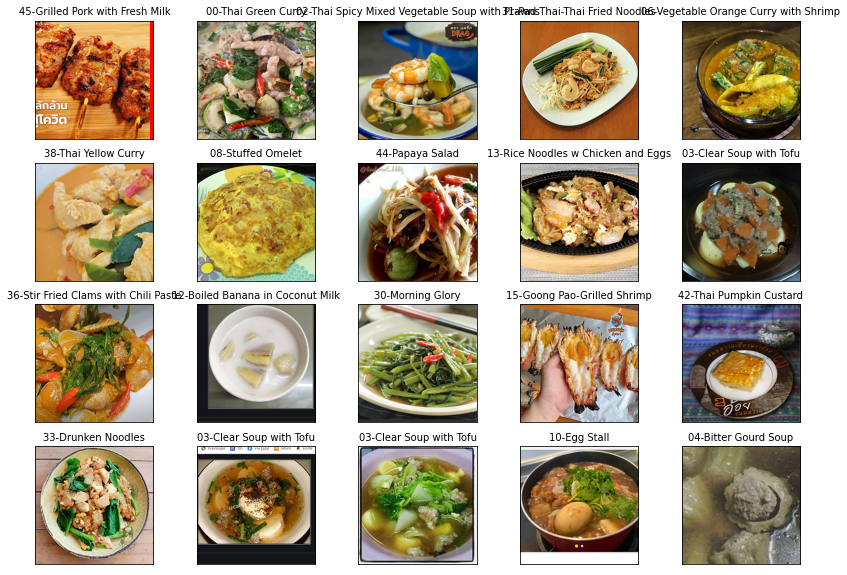

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
for i in range(20):
    random = np.random.randint(1,len(train_df))
    plt.subplot(4,5,i+1)
    img = train_df.loc[random,"file_paths"]
    plt.imshow(plt.imread(img))
    plt.title(train_df.loc[random, "labels"], size = 10, color = "black")
    plt.xticks([])
    plt.yticks([])

plt.show()

In [ ]:
import keras_preprocessing
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input


target_size=(224,224)
batch_size=64

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, zoom_range=0.2, shear_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen = train_datagen.flow_from_dataframe(train_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='categorical')
valid_gen = test_datagen.flow_from_dataframe(valid_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='categorical')
test_gen = test_datagen.flow_from_dataframe(test_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='categorical')

Found 11520 validated image filenames belonging to 48 classes.
Found 1440 validated image filenames belonging to 48 classes.
Found 1440 validated image filenames belonging to 48 classes.


In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False, input_shape=(224,224,3), weights='imagenet')
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(48, activation='softmax')
])

model.summary()

16719872/16705208 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 7, 7, 1280)        4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               163968    
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 48)                6192      
Total params: 4,220,243
Trainable params: 4,177,964
Non-t

In [ ]:
from tensorflow.keras.optimizers import Adam

lr=0.001
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=lr), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# callback
patience = 2
stop_patience = 5
factor = 0.5

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("classify_model.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=stop_patience, monitor='val_loss', verbose=1, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience, verbose=1)
]


In [ ]:
epochs = 8
history = model.fit(train_gen, validation_data=valid_gen, epochs=epochs, callbacks=callbacks, verbose=1)

Epoch 1/8
180/180 [==============================] - 4486s 25s/step - loss: 1.2626 - accuracy: 0.6749 - val_loss: 0.5022 - val_accuracy: 0.8542


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/8
180/180 [==============================] - 240s 1s/step - loss: 0.3429 - accuracy: 0.9069 - val_loss: 0.3324 - val_accuracy: 0.9076
Epoch 3/8
180/180 [==============================] - 235s 1s/step - loss: 0.2313 - accuracy: 0.9339 - val_loss: 0.4682 - val_accuracy: 0.8611
Epoch 4/8
180/180 [==============================] - 235s 1s/step - loss: 0.1738 - accuracy: 0.9488 - val_loss: 0.3844 - val_accuracy: 0.8847

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 5/8
180/180 [==============================] - 233s 1s/step - loss: 0.0795 - accuracy: 0.9776 - val_loss: 0.1489 - val_accuracy: 0.9590
Epoch 6/8
180/180 [==============================] - 235s 1s/step - loss: 0.0488 - accuracy: 0.9872 - val_loss: 0.2042 - val_accuracy: 0.9444
Epoch 7/8
180/180 [==============================] - 237s 1s/step - loss: 0.0444 - accuracy: 0.9898 - val_loss: 0.1885 - val_accuracy: 0.9486

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0002500

<function matplotlib.pyplot.show>

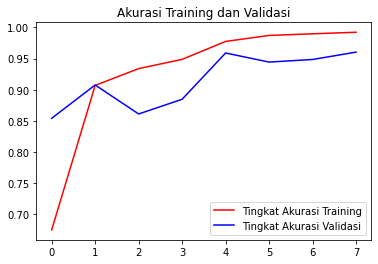

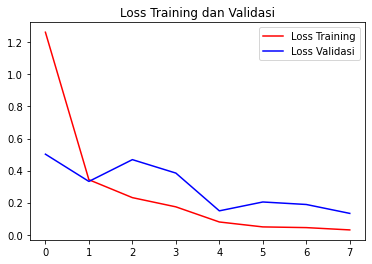

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoches = range(len(acc))

plt.plot(epoches, acc, 'r', label='Tingkat Akurasi Training')
plt.plot(epoches, val_acc, 'b', label='Tingkat Akurasi Validasi')
plt.title('Akurasi Training dan Validasi')
plt.legend(loc=0)
plt.figure()
plt.show

plt.plot(epoches, loss, 'r', label='Loss Training')
plt.plot(epoches, val_loss, 'b', label='Loss Validasi')
plt.title('Loss Training dan Validasi')
plt.legend(loc=0)
plt.figure()
plt.show

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)